<a href="https://colab.research.google.com/github/ww-Jing/Algorithmic_Trading/blob/main/Stock_simulation_BM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [68]:
stock_data = yf.download('GOOG', '2018-01-02', '2022-01-02') 

[*********************100%***********************]  1 of 1 completed


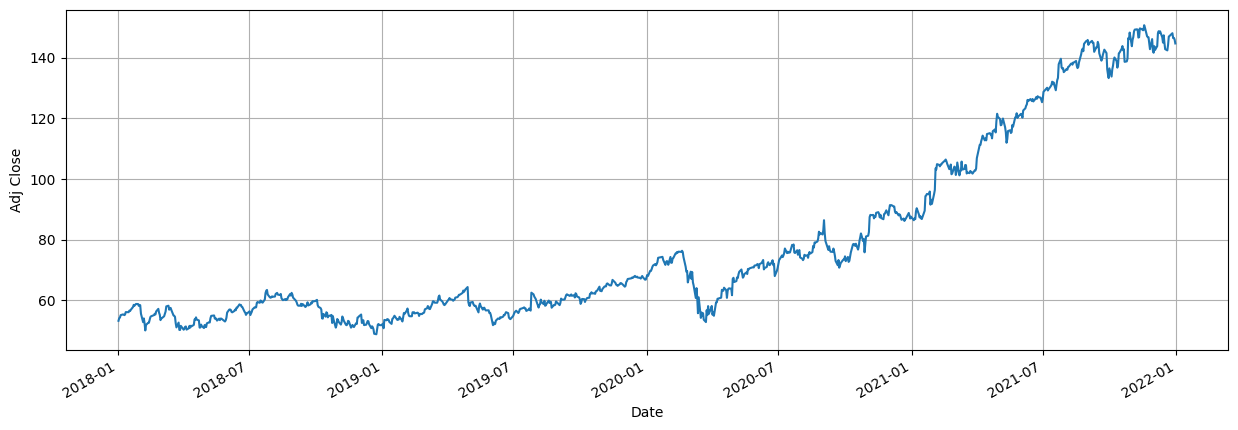

In [29]:
stock_data['Adj Close'].plot(figsize=(15,5),grid=True)
plt.ylabel('Adj Close')
plt.show()

In [6]:
#define mu and sigma
stock_data['diff'] = stock_data['Adj Close'].pct_change()
mu = stock_data['diff'][1:].mean() 
sigma = stock_data['diff'][1:].std()

Text(0, 0.5, 'Price')

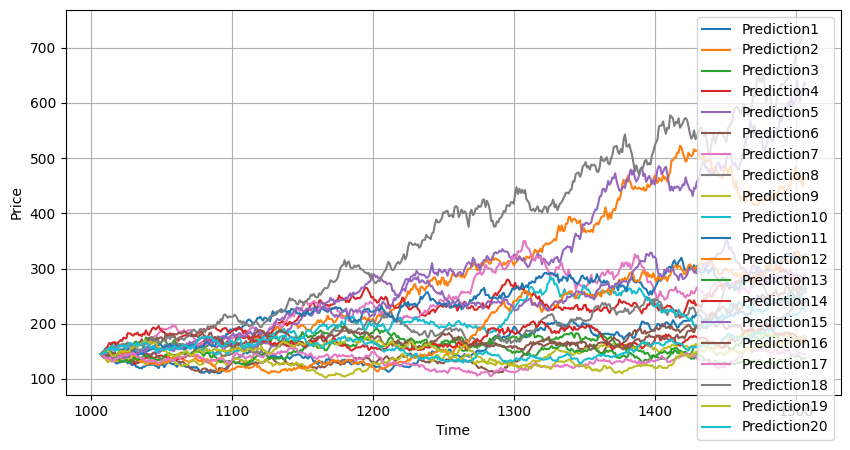

In [74]:
#對未來500天股價 做20次預測
data_num = stock_data.shape[0]
predict_day_num = 500

predict = {}
for num in range(1, 21): 
  predict['Prediction'+str(num)] = list(stock_data['Adj Close'].values)
  for i in range(data_num, data_num + predict_day_num): 
      pre = predict['Prediction'+str(num)][i -1] 
      new = pre*(1+ mu) + pre*sigma*np.random.normal(0,1) 
      predict['Prediction'+str(num)].append(new) 

df = pd.DataFrame(predict)
predict_df = df.iloc[-(predict_day_num+1):]
predict_df.plot(figsize=(10,5),grid=True)
plt.xlabel('Time')
plt.ylabel('Price')

In [75]:
#對未來5天股價 做1000次預測
data_num = stock_data.shape[0]
predict_day_num = 5

predict = {}
for num in range(1, 1001): 
  predict['Prediction'+str(num)] = list(stock_data['Adj Close'].values)
  for i in range(data_num, data_num + predict_day_num): 
      pre = predict['Prediction'+str(num)][i -1] 
      new = pre*(1+ mu) + pre*sigma*np.random.normal(0,1) 
      predict['Prediction'+str(num)].append(new) 

df = pd.DataFrame(predict)
predict_1000 = df.iloc[-(predict_day_num+1):]

In [76]:
#用1000次預測的最大最小平均與真實股價做比較
real_data = yf.download('GOOG', '2022-01-02', '2022-01-06') 

N = int(predict_1000.shape[1])
predict_1000_nu = predict_1000.to_numpy()
predict_max = [predict_1000_nu[:, i].max() for i in range(0, N)]
predict_min = [predict_1000_nu[:, i].min() for i in range(0, N)]
predict_pred = .5 * np.array(predict_max) + .5 * np.array(predict_min)

df = pd.DataFrame(data=[real_data.reset_index()['Adj Close'], predict_pred], index=['real', 'pred']).T

df.index = real_data.index
mse = 1/len(df) * np.sum((df['pred'] - df['real']) ** 2)

[*********************100%***********************]  1 of 1 completed


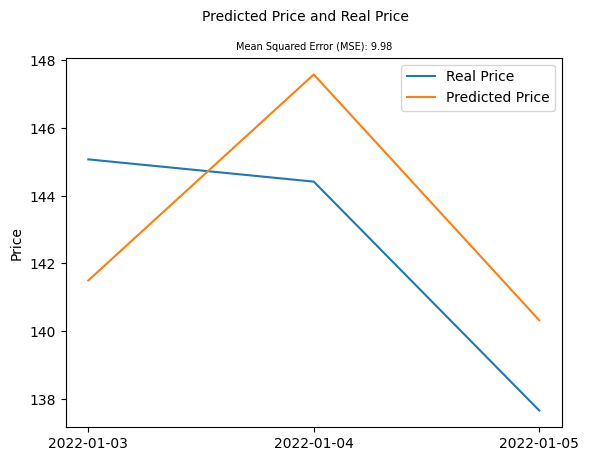

In [77]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
plt.suptitle('Predicted Price and Real Price', fontsize=10)
plt.title('Mean Squared Error (MSE): {}'.format(np.round(mse, 2)), fontsize=7)
plt.ylabel('Price')
plt.plot(df)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.legend(['Real Price', 'Predicted Price'])
plt.show()